In [62]:
# Import dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [20]:
# Generate cities list

# List for holding lat/lng and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
# Hit API to call a weather check on each city

# Set base url and units variables, combine to define query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define empty lists to store data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: khatanga, City ID: 2022572
City Name: saskylakh, City ID: 2017155
City Name: bredasdorp, City ID: 1015776
City Name: abha, City ID: 110690
City Name: katsuura, City ID: 2112309
City Name: upernavik, City ID: 3418910
City Name: valley station, City ID: 4311963
City Name: tiksi, City ID: 2015306
City Name: iqaluit, City ID: 5983720
City Name: nantucket, City ID: 4944903
City Name: lakes entrance, City ID: 2160735
City Name: punta arenas, City ID: 3874787
City Name: ancud, City ID: 3899695
City Name: mataura, City ID: 6201424
City Name: ushuaia, City ID: 3833367
City Name: hobart, City ID: 2163355
City Name: kodiak, City ID: 5866583
City Name: kaeo, City ID: 2189343
City Name: barra do corda, City ID: 3406318
City Name: lebu, City ID: 3883457
City Name: bathsheba, City ID: 3374083
That record does not exist, searching for next record...
City Name: jamestown, City ID: 5122534
City Name: clyde river, City ID: 5924351
City Name: navahrudak, City ID: 624785
City Name: presidencia r

City Name: ust-kulom, City ID: 478050
City Name: port hawkesbury, City ID: 6111867
City Name: hohhot, City ID: 2036892
City Name: semey, City ID: 1519422
City Name: krasnoye, City ID: 704277
City Name: enumclaw, City ID: 5793822
City Name: hamilton, City ID: 4513583
City Name: puerto leguizamo, City ID: 3671437
City Name: jiexiu, City ID: 1805833
City Name: redmond, City ID: 5808079
City Name: pitimbu, City ID: 3391889
That record does not exist, searching for next record...
City Name: san patricio, City ID: 4726521
City Name: campos belos, City ID: 3467687
City Name: yaan, City ID: 2338660
City Name: ouadda, City ID: 236901
City Name: montefiascone, City ID: 3172931
City Name: codrington, City ID: 2171099
City Name: platonovka, City ID: 509104
City Name: lyuban, City ID: 625721
City Name: seoul, City ID: 1835848
City Name: grindavik, City ID: 3416888
City Name: yellowknife, City ID: 6185377
City Name: kapuskasing, City ID: 5989403
City Name: naze, City ID: 1855540
City Name: porto nac

City Name: pisco, City ID: 3932145
City Name: udarnyy, City ID: 826996
City Name: nuevo laredo, City ID: 3522551
City Name: lewiston, City ID: 4969398
City Name: zhigansk, City ID: 2012530
City Name: muhos, City ID: 645765
City Name: bursa, City ID: 750268
City Name: nioki, City ID: 2311968
City Name: neyshabur, City ID: 122285
City Name: isla del bosque, City ID: 3976232
City Name: ayutla, City ID: 4017924
City Name: nunkini, City ID: 3522514
City Name: ketchikan, City ID: 5554428
City Name: bara, City ID: 2347758
City Name: mayumba, City ID: 2399001
City Name: ulladulla, City ID: 2145554
City Name: gemena, City ID: 2315728
City Name: vao, City ID: 2137773
That record does not exist, searching for next record...
City Name: toktogul, City ID: 1538648
That record does not exist, searching for next record...
City Name: marawi, City ID: 1701054
City Name: kindu, City ID: 212902
City Name: komsomolskiy, City ID: 1513491
City Name: visnes, City ID: 3131500
City Name: talas, City ID: 299900


City Name: luanda, City ID: 2240449
City Name: robertson, City ID: 4653638
City Name: annur, City ID: 1278539
City Name: the valley, City ID: 3573374
City Name: benguela, City ID: 3351663


In [21]:
# Convert data into dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,2022572,Khatanga,RU,71.9667,102.5000,-6.02,91,16,5.28
1,2017155,Saskylakh,RU,71.9167,114.0833,-4.90,92,100,2.06
2,1015776,Bredasdorp,ZA,-34.5322,20.0403,15.62,75,100,6.15
3,110690,Abhā,SA,18.2164,42.5053,20.14,46,0,0.00
4,2112309,Katsuura,JP,35.1333,140.3000,18.17,72,100,2.97


In [22]:
# Export to .csv file
cities_df.to_csv("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Resources/city_weather.csv", index=False, header=True)

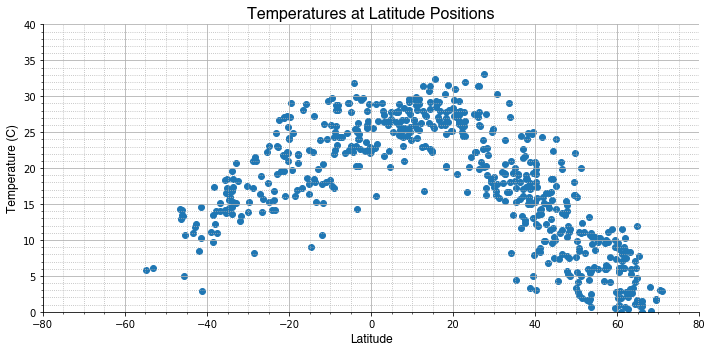

In [63]:
# Plot – Latitude vs. Temperature

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]
plt.scatter(x_values,y_values)

# Titles / labels
plt.title('Temperatures at Latitude Positions', fontdict = font_1)
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Temperature (C)', fontdict = font_2)

# Limit x/y axis
plt.ylim(0, 40)
plt.xlim(-80, 80)

# Ticks
plt.minorticks_on()

# Grid
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Layout
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show and save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/lat_temp.png")
plt.show()

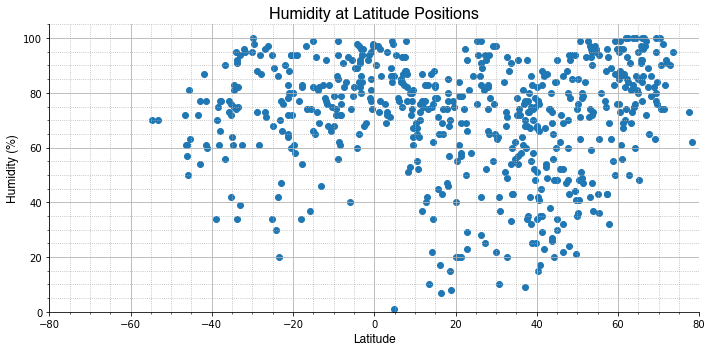

In [64]:
# Plot – Latitude vs. Humidity

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]
plt.scatter(x_values,y_values)

# Titles / labels
plt.title('Humidity at Latitude Positions', fontdict = font_1)
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Humidity (%)', fontdict = font_2)

# Limit x/y axis
plt.ylim(0, 105)
plt.xlim(-80, 80)

# Ticks
plt.minorticks_on()

# Grid
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Layout
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show and save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/lat_humidity.png")
plt.show()

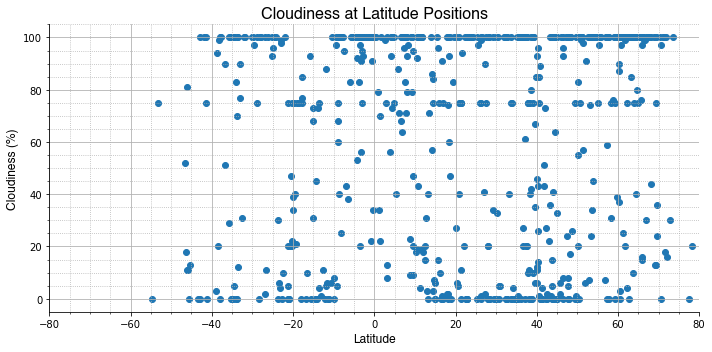

In [65]:
# Plot – Latitude vs. Cloudiness

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]
plt.scatter(x_values,y_values)

# Titles / labels
plt.title('Cloudiness at Latitude Positions', fontdict = font_1)
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Cloudiness (%)', fontdict = font_2)

# Limit x/y axis
plt.ylim(-5, 105)
plt.xlim(-80, 80)

# Ticks
plt.minorticks_on()

# Grid
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Layout
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show and save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/lat_cloudiness.png")
plt.show()

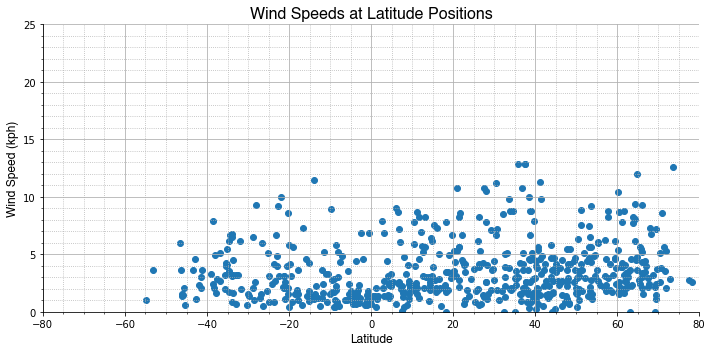

In [66]:
# Plot – Latitude vs. Wind Speed

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Titles / labels
plt.title('Wind Speeds at Latitude Positions', fontdict = font_1)
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Wind Speed (kph)', fontdict = font_2)

# Limit x/y axis
plt.ylim(0, 25)
plt.xlim(-80, 80)

# Ticks
plt.minorticks_on()

# Grid
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Layout
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show and save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/lat_wind_speed.png")
plt.show()

In [49]:
# Linear regression

# Create a function to create linear regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation: {correlation}")
    print(f"Line: {line_eq}")

    return regress_values, line_eq

In [50]:
# Create Northern/Southern hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

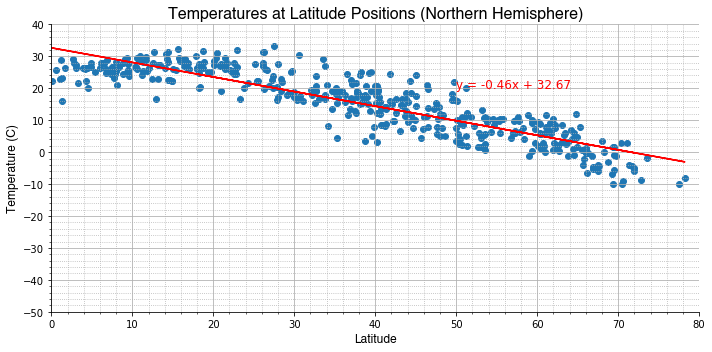

In [67]:
# Linear regression – Northern Hemisphere (max temp vs. latitude)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

# LR + plot / titles / labels
plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)', fontdict = font_1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Temperature (C)', fontdict = font_2)

# Limit axis
plt.ylim(-50, 40)
plt.xlim(0, 80)

# Ticks
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Layout
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show and save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/nh_lat_temp_regression.png")
plt.show()

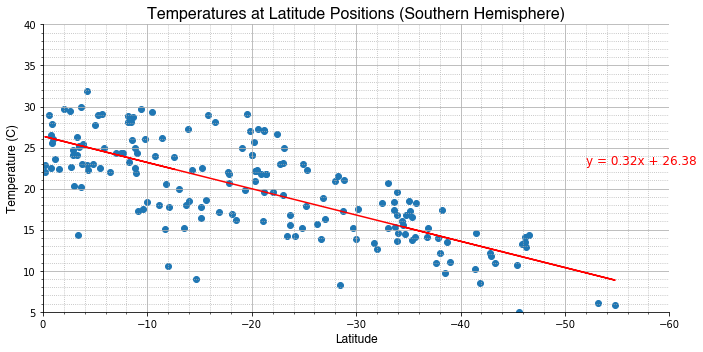

In [68]:
# Linear regression – Southern Hemisphere (max temp vs. latitude)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot 
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

# LR + plot / titles / labels
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values,y_values)

# Titles / labels / annotations
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)', fontdict = font_1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,23),fontsize=12,color="red")
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Temperature (C)', fontdict = font_2)

# Limit axis
plt.ylim(5, 40)
plt.xlim(0, -60)

# Ticks
plt.minorticks_on()

# Layout
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show and save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/sh_lat_temp_regression.png")
plt.show()

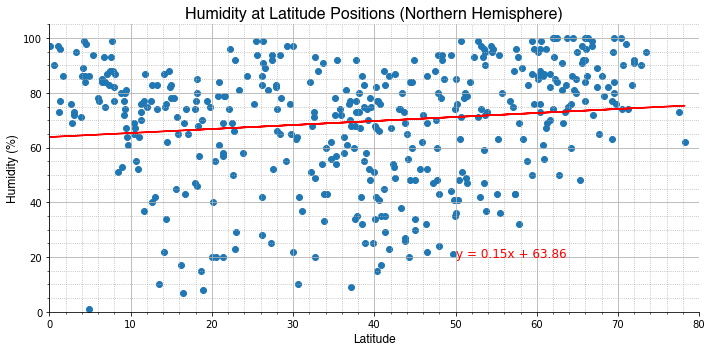

In [70]:
# Linear regression – Northern Hemisphere (Humidity vs. latitude)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

# LR + plot / titles / labels
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

# Titles / labels / annotations
plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)', fontdict = font_1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20), fontsize=12, color="red")
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Humidity (%)', fontdict = font_2)

# Limit axis
plt.ylim(0, 105)
plt.xlim(0, 80)

# Ticks
plt.minorticks_on()

# Layout
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/nh_lat_humidity_regression.png")
plt.show()

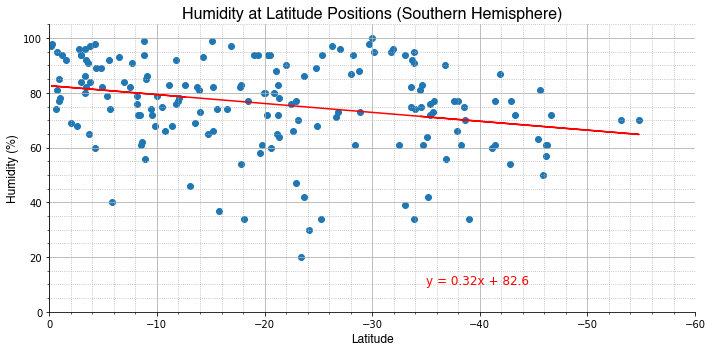

In [72]:
# Linear regression – Southern Hemisphere (Humidity vs. latitude)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

# LR + plot / titles / labels
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

# Titles / labels / annotations
plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)', fontdict = font_1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,10),fontsize=12,color="red")
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Humidity (%)', fontdict = font_2)

# Limit axis
plt.ylim(0, 105)
plt.xlim(0, -60)

# Ticks
plt.minorticks_on()

# Layout
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show and save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/sh_lat_humidity_regression.png")
plt.show()

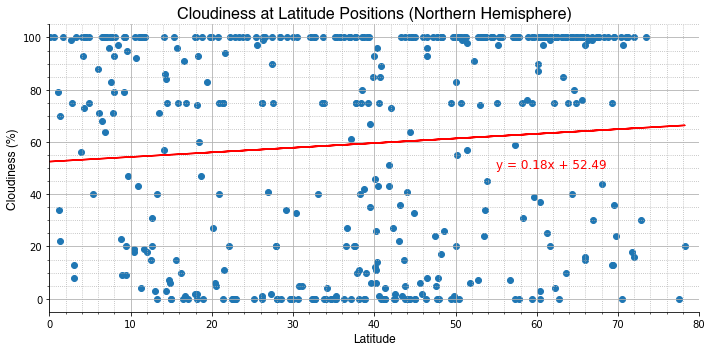

In [74]:
# Linear regression – Northern Hemisphere (Cloudiness vs. latitude)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

# LR + plot / titles / labels
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values,y_values)

# Titles / labels / annotations
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)', fontdict = font_1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,50), fontsize=12, color="red")
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Cloudiness (%)', fontdict = font_2)

# Limit axis
plt.ylim(-5, 105)
plt.xlim(0, 80)

# Ticks
plt.minorticks_on()

# Layout
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save and show
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/nh_lat_cloud_regression.png")
plt.show()

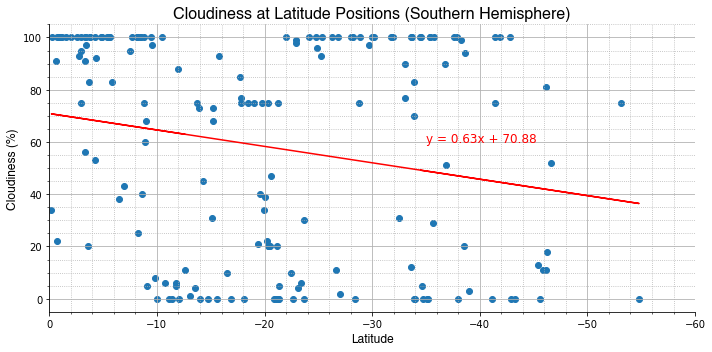

In [76]:
# Linear regression – Southern Hemisphere (Cloudiness vs. latitude)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

# LR + plot / titles / labels
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values,y_values)

# Titles / labels / annotations
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)', fontdict = font_1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,60),fontsize=12,color="red")
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Cloudiness (%)', fontdict = font_2)

# Limit axis
plt.ylim(-5, 105)
plt.xlim(0, -60)

# Ticks
plt.minorticks_on()

# Layout
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show and save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/sh_lat_cloud_regression.png")
plt.show()

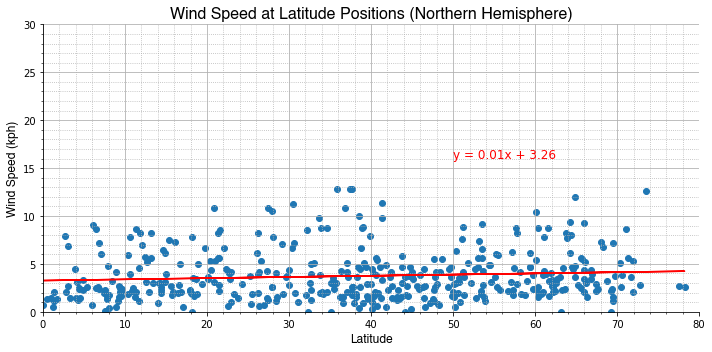

In [77]:
# Linear regression – Northern Hemisphere (Wind Speed vs. latitude)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

# LR + plot / titles / labels
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values,y_values)

# Titles / labels / annotations
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)', fontdict = font_1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,16),fontsize=12,color="red")
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Wind Speed (kph)', fontdict = font_2)

# Limit axis
plt.ylim(0, 30)
plt.xlim(0, 80)

# Ticks
plt.minorticks_on()

# Layout
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show and save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/nh_lat_wind_regression.png")
plt.show()

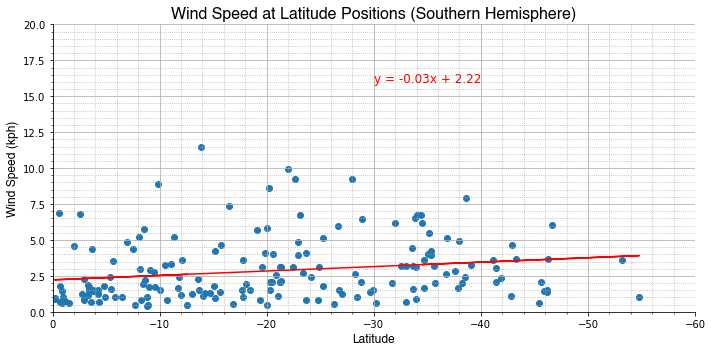

In [81]:
# Linear regression – Southern Hemisphere (Wind Speed vs. latitude)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Plot
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

# LR + plot / titles / labels
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values,y_values)

# Titles / labels / annotations
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)', fontdict = font_1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,16),fontsize=12,color="red")
plt.xlabel('Latitude', fontdict = font_2)
plt.ylabel('Wind Speed (kph)', fontdict = font_2)

# Limit axis
plt.ylim(0, 20)
plt.xlim(0, -60)

# Ticks
plt.minorticks_on()

# Layout
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show and save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/global-city-weather/Images/sh_lat_wind_regression.png")
plt.show()